### Simple Linear Regression

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("data.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

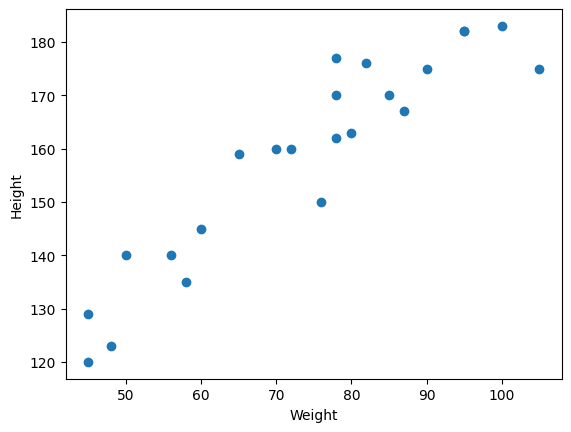

In [10]:
# Scatter Plot
plt.scatter(x=df["Weight"], y=df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")

In [11]:
# Check Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


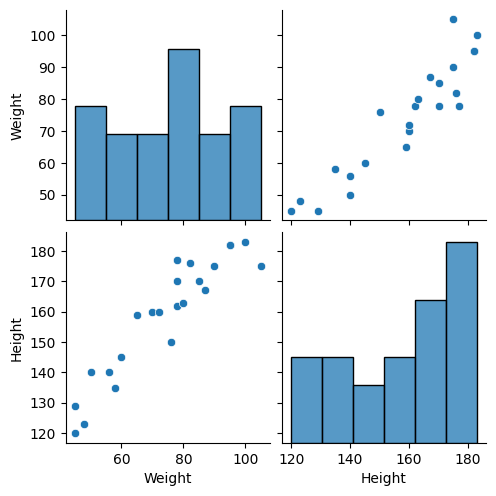

In [13]:
sns.pairplot(df)

### Independent and Dependent Features

In [17]:
# Independent feature (should be a df or 2d array)
X = df[["Weight"]]

# Dependent feature (can be 1d)
y = df["Height"] 

### Train, Test, Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Standardisation

In [25]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Apply Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
regression = LinearRegression()

In [34]:
regression.fit(X_train, y_train)

LinearRegression()

In [38]:
print(f"Coefficient or Slope: {regression.coef_}")
print(f"Intercept: {regression.intercept_}")

Coefficient or Slope: [17.2982057]
Intercept: 156.47058823529412


### Plot Best Fit Line
For training data
- Coefficient or Slope: 17.2982057
- Intercept: 156.47058823529412

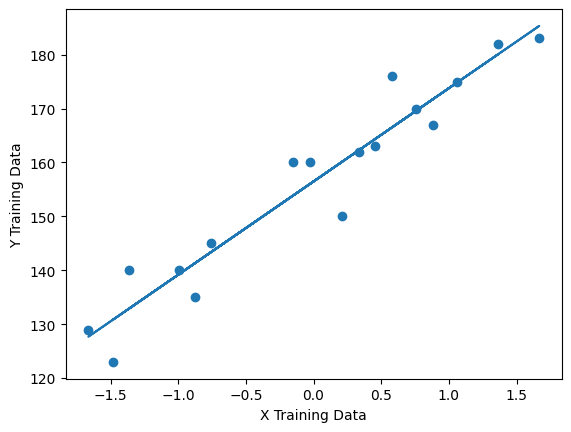

In [40]:
plt.scatter(X_train, y_train)
plt.xlabel("X Training Data")
plt.ylabel("Y Training Data")
plt.plot(X_train, regression.predict(X_train))

### Prediction For Test Data

In [41]:
y_pred = regression.predict(X_test)

### Performance Metrics

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [43]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MSE: 114.84069295228699
MAE: 9.66512588679501
RMSE: 10.716374991212605


In [44]:
from sklearn.metrics import r2_score

In [46]:
score = r2_score(y_test, y_pred)
print(f"R2 Score: {score}")

R2 Score: 0.7360826717981276


In [47]:
adjusted_score = 1 - (1-score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(f"Adjusted R2 Score: {adjusted_score}")

Adjusted R2 Score: 0.6701033397476595


### OLS Linear Regression

In [48]:
import statsmodels.api as sm

In [50]:
model = sm.OLS(y_train, X_train).fit()

In [51]:
ols_pred = model.predict(X_test)
print(f"OLS Prediction: {ols_pred}")

OLS Prediction: [  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [52]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 06 Feb 2025   Prob (F-statistic):                       0.664
Time:                        22:19:12   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

d:\Developement\Udemy course Python\Simple Linear Regression\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


### Prediction For New Data

In [55]:
regression.predict(scaler.transform([[72]]))

d:\Developement\Udemy course Python\Simple Linear Regression\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])